## Assignment 3 Pattern Mining and Recommender Systems: Individual Code

### Task 2: Collaborative Filtering

### Ky Cuong Pham, 1906313, Version 01

# EDA

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Load the data
data = pd.read_csv("data/Groceries data train.csv")
data = data.dropna()

# Convert columns to appropriate types
data['User_id'] = data['User_id'].astype('int')
data['year'] = data['year'].astype('int')
data['month'] = data['month'].astype('int')
data['day'] = data['day'].astype('int')
data['day_of_week'] = data['day_of_week'].astype('int')

data.head()

,User_id,Date,itemDescription,year,month,day,day_of_week
0,2351,1/01/2014,cleaner,2014,1,1,2
1,2226,1/01/2014,sausage,2014,1,1,2
2,1922,1/01/2014,tropical fruit,2014,1,1,2
3,2943,1/01/2014,whole milk,2014,1,1,2
4,1249,1/01/2014,citrus fruit,2014,1,1,2


In [3]:
data.info()
data.describe()
data.nunique()


<class 'pandas.core.frame.DataFrame'>
Index: 19382 entries, 0 to 19381
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User_id          19382 non-null  int64 
 1   Date             19382 non-null  object
 2   itemDescription  19382 non-null  object
 3   year             19382 non-null  int64 
 4   month            19382 non-null  int64 
 5   day              19382 non-null  int64 
 6   day_of_week      19382 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 1.2+ MB


User_id            3493
Date                384
itemDescription     167
year                  2
month                12
day                  31
day_of_week           7
dtype: int64

In [4]:
# EDA
print(data['User_id'].nunique(), "unique users")
print(data['itemDescription'].nunique(), "unique items")
print(data.shape[0], "total transactions")

3493 unique users
167 unique items
19382 total transactions


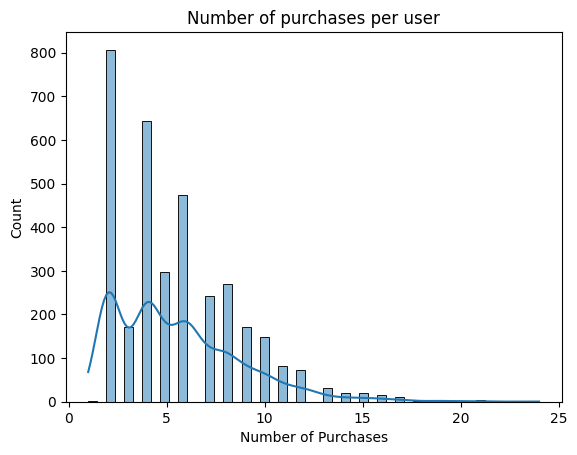

In [5]:
# Purchases per user
user_counts = data['User_id'].value_counts()
sns.histplot(user_counts, bins=50, kde=True)
plt.title("Number of purchases per user")
plt.xlabel("Number of Purchases")
plt.show()

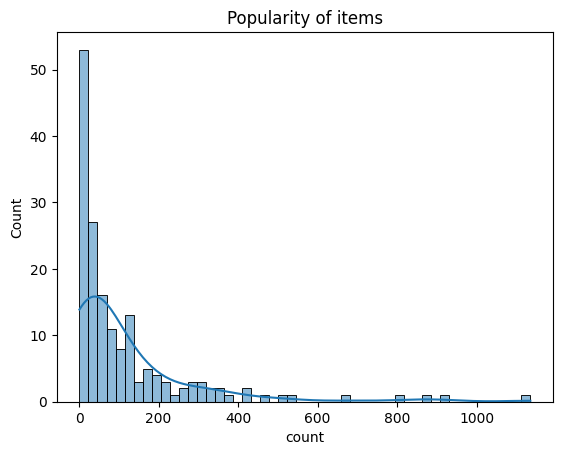

In [6]:
# Purchases per item
item_counts = data['itemDescription'].value_counts()
sns.histplot(item_counts, bins=50, kde=True)
plt.title("Popularity of items")
plt.show()

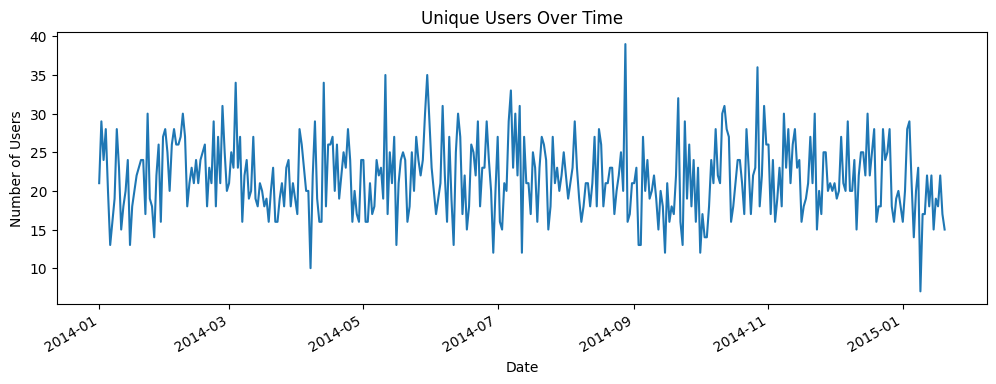

In [7]:
data['date'] = pd.to_datetime(data[['year', 'month', 'day']])
user_time_trend = data.groupby(['date'])['User_id'].nunique()

user_time_trend.plot(figsize=(12,4))
plt.title("Unique Users Over Time")
plt.ylabel("Number of Users")
plt.xlabel("Date")
plt.show()


In [8]:
n_users = data['User_id'].nunique()
n_items = data['itemDescription'].nunique()
print(f"Users: {n_users}, Items: {n_items}")

interaction_matrix = pd.crosstab(data['User_id'], data['itemDescription'])
sparsity = 1.0 - (interaction_matrix.values.sum() / (interaction_matrix.shape[0] * interaction_matrix.shape[1]))
print(f"Sparsity of interaction matrix: {sparsity:.2f}")


Users: 3493, Items: 167
Sparsity of interaction matrix: 0.97


Sparsed, maybe using model-based is better 